In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading mnist data
(Xtrain, ytrain),(Xtest, ytest) = mnist.load_data()

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


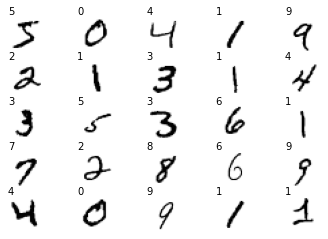

In [3]:
# see the shape of the train and test
print(Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape)

# plot some digits
from matplotlib import pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(Xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')
    plt.text(0, 0, ytrain[i]) # displays y-values in each subplot

In [4]:
ytest_true = ytest.copy()

In [5]:
# reshaping the X
Xtrain = Xtrain.reshape(60000, 28, 28, 1)/255
Xtest = Xtest.reshape(10000, 28, 28, 1)/255

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [6]:
K.clear_session()

model1 = Sequential([
    Conv2D(filters=30,             
           kernel_size=(3,3),      # kernel has 9+1 parameters
           strides=(2,2),          
           activation='relu',      
           input_shape=(28,28,1)),
    Conv2D(filters=15, kernel_size=(3,3), strides=(2,2), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')])

# build the computation graph
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 30)        300       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 15)          4065      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 15)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 100)               6100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                        

In [7]:
callback = EarlyStopping(monitor='val_loss', patience=3)
h = model1.fit(Xtrain,ytrain, epochs=30, batch_size=500, callbacks=[callback], validation_split=0.2)

Epoch 1/30
96/96 [==============================] - 18s 170ms/step - loss: 1.5516 - accuracy: 0.4933 - val_loss: 0.6213 - val_accuracy: 0.8127
Epoch 2/30
96/96 [==============================] - 10s 101ms/step - loss: 0.5400 - accuracy: 0.8294 - val_loss: 0.3398 - val_accuracy: 0.8957
Epoch 3/30
96/96 [==============================] - 9s 89ms/step - loss: 0.3765 - accuracy: 0.8814 - val_loss: 0.2587 - val_accuracy: 0.9243
Epoch 4/30
96/96 [==============================] - 8s 85ms/step - loss: 0.3079 - accuracy: 0.9023 - val_loss: 0.2224 - val_accuracy: 0.9345
Epoch 5/30
96/96 [==============================] - 8s 85ms/step - loss: 0.2708 - accuracy: 0.9150 - val_loss: 0.1964 - val_accuracy: 0.9417
Epoch 6/30
96/96 [==============================] - 8s 85ms/step - loss: 0.2418 - accuracy: 0.9247 - val_loss: 0.1827 - val_accuracy: 0.9471
Epoch 7/30
96/96 [==============================] - 8s 85ms/step - loss: 0.2208 - accuracy: 0.9304 - val_loss: 0.1785 - val_accuracy: 0.9445
Epoch 8/3

In [8]:
h.history

{'loss': [1.5516349077224731,
  0.5400393605232239,
  0.37650448083877563,
  0.30787456035614014,
  0.2708413004875183,
  0.2418450564146042,
  0.22075968980789185,
  0.20196008682250977,
  0.19117291271686554,
  0.1772952526807785,
  0.1668674200773239,
  0.15942524373531342,
  0.1530577540397644,
  0.1470106989145279,
  0.14010876417160034,
  0.13294179737567902,
  0.12931683659553528,
  0.12543463706970215,
  0.12045338749885559,
  0.11762905865907669,
  0.11558791249990463,
  0.11184766888618469,
  0.10622378438711166,
  0.10351085662841797,
  0.10182565450668335,
  0.09938877075910568,
  0.09555647522211075,
  0.09330233931541443,
  0.09110613167285919,
  0.09042434394359589],
 'accuracy': [0.4933125078678131,
  0.8293541669845581,
  0.8813750147819519,
  0.9023333191871643,
  0.9150416851043701,
  0.9247499704360962,
  0.9303958415985107,
  0.9360416531562805,
  0.9402499794960022,
  0.9439166784286499,
  0.9474166631698608,
  0.9497708082199097,
  0.9518541693687439,
  0.9533125

In [9]:
# save the model:
model1.save('model1.h5')

In [10]:
# test loss and score
model1.evaluate(Xtest, ytest, batch_size=500)

20/20 [==============================] - 1s 28ms/step - loss: 0.0863 - accuracy: 0.9730


[0.08633872866630554, 0.9729999899864197]

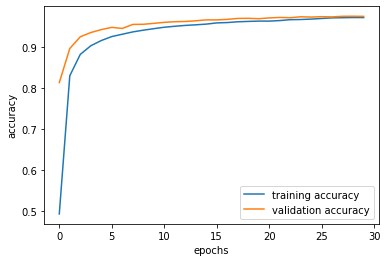

In [11]:
# plot accuracy curve
plt.plot(h.history['accuracy'], label='training accuracy')
plt.plot(h.history['val_accuracy'], label= 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();

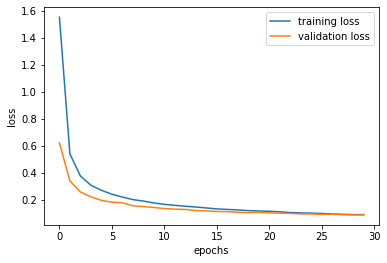

In [12]:
# plot loss
plt.plot(h.history['loss'], label='training loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

In [13]:
ypred = model1.predict(Xtest)

313/313 [==============================] - 2s 5ms/step


In [14]:
np.argmax(ypred[1])

2

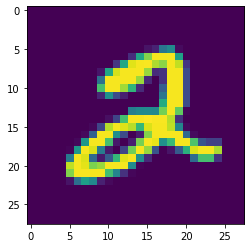

In [35]:
plt.imshow(Xtrain[5,:,:,0]);

In [19]:
ytest_true[1], ytest[1]

(2, array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

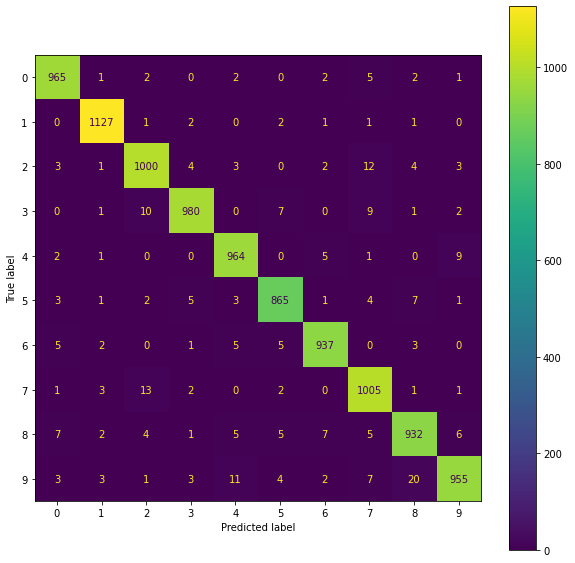

In [20]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_true=ytest_true, y_pred=np.argmax(ypred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=np.unique(ytest_true))
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax);